## Import Data and Library

### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile

### Import Data

In [2]:
with ZipFile('big-startup-secsees-fail-dataset-from-crunchbase.zip') as raw_zip:
    raw_zip.extractall(path='datasets')
    
    raw_data = pd.read_csv('datasets/big_startup_secsees_dataset.csv')

In [3]:
raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


## Data Inspection

### Total Amount of Rows and Columns

In [4]:
raw_data.shape

(66368, 14)

### Data Fields

In [5]:
raw_data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

#### Data Fields Information
1. permalink: Link to Organization
2. name: Company Name
3. homepage_url: Startup Site
4. category_list: Field of company
5. funding_total_usd: Total Funding in USD
6. status: Operating Status
7. country_code: Country Code
8. state_code: State Code of company location
9. region: Region of company location
10. city: Cit of company location
11. funding_rounds: the number of times a startup opts to raise capital from the market.
12. founded_at: the date when the startup is founded
13. first_funding_at: the date when the startup get first funding
14. last_funding_at: the date when the startup get last funding

### Visualize the Target Data (Status)

<Axes: >

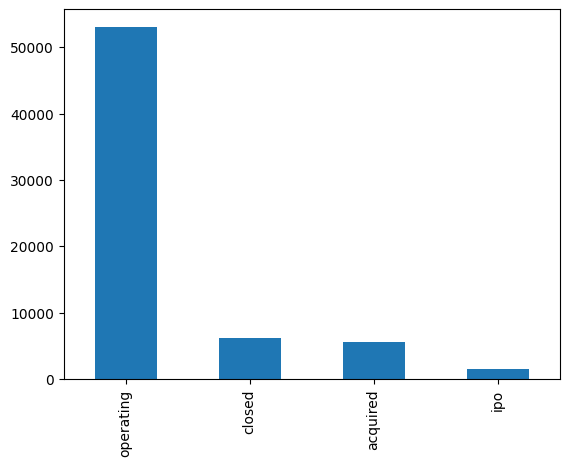

In [6]:
raw_data['status'].value_counts().plot(kind='bar')

Our objective is to find whether the startup will fail (closed) or success (acquier/ipo), so we dont need operating status. We will drop these rows. Note: we considered acquire as success.

In [7]:
valid_index = (~(raw_data['status'] == 'operating'))

raw_data = raw_data[valid_index]

raw_data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000,acquired,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000,acquired,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520,acquired,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,13000000,ipo,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786,ipo,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,15419877,closed,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


<Axes: >

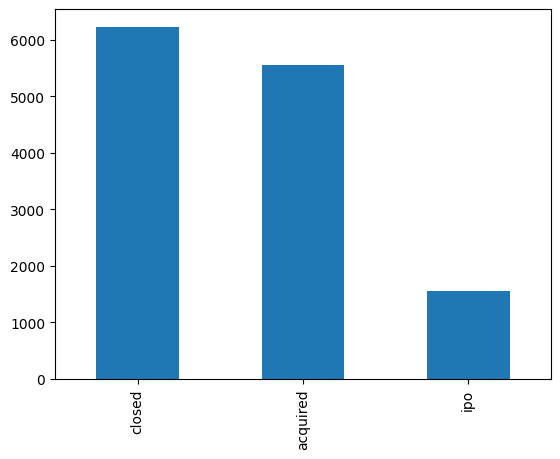

In [35]:
raw_data['status'].value_counts().plot(kind='bar')

It look like the target variable not distributed uniformly, where the 'closed' and 'acquired' dominated the 'ipo' value. So we will consider ROC-AUC or F! score.

### Check Duplicate Startup Name

In [8]:
check_name = raw_data['name'].value_counts()

check_name[check_name > 1]

SpaceConnect              2
SquareOne                 2
Stream                    2
Bloodhound                2
Stupsr                    2
Cardiovascular Systems    2
SHIFT                     2
Archive                   2
Name: name, dtype: int64

There are 239 duplicated startup name, lets check wheter the startup has the same name or the data is just duplicated by checking the permalink column.

In [9]:
duplicate_name = check_name[check_name > 1].index

duplicate_inspect = raw_data[raw_data['name'].str.fullmatch('|'.join(duplicate_name)) == True]

duplicate_inspect[['permalink', 'name']]

,permalink,name
4120,/organization/archive,Archive
4121,/organization/archive-2,Archive
7537,/organization/bloodhound,Bloodhound
7538,/organization/bloodhound-2,Bloodhound
9738,/organization/cardiovascular-systems,Cardiovascular Systems
9739,/organization/cardiovascular-systems-incorporated,Cardiovascular Systems
51149,/organization/shift,SHIFT
51151,/organization/shift-4,SHIFT
53581,/organization/spaceconnect,SpaceConnect
53582,/organization/spaceconnect-2,SpaceConnect


Lets check the uniqueness of permalink column.

In [10]:
duplicate_inspect[['permalink', 'name']].nunique()

permalink    16
name          8
dtype: int64

The permalink is unique! However, one thing that bother me is that some of the duplicated startup name have similiar permalink, for example '3DIVAZ' startup have permalink '/organization/3divaz-2' and '/organization/3divaz-3', it could be that the data was inputed two times and the permalink is set to unique in the beginning, hence it automatically iterate the permalink name if the input data is same. But it is just speculation, we don't have enough information about the data. So for now lets assume these startup coincidentally have the same name.

### Check Data Types

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13334 entries, 15 to 66360
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          13334 non-null  object
 1   name               13333 non-null  object
 2   homepage_url       12117 non-null  object
 3   category_list      12248 non-null  object
 4   funding_total_usd  13334 non-null  object
 5   status             13334 non-null  object
 6   country_code       11343 non-null  object
 7   state_code         11125 non-null  object
 8   region             11182 non-null  object
 9   city               11182 non-null  object
 10  funding_rounds     13334 non-null  int64 
 11  founded_at         9602 non-null   object
 12  first_funding_at   13332 non-null  object
 13  last_funding_at    13334 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.5+ MB


The funding_total_usd data type is wrong, it should be float. Lets check how many data that have '-' element.

In [12]:
(raw_data['funding_total_usd'] == '-').value_counts()

False    11143
True      2191
Name: funding_total_usd, dtype: int64

In [13]:
raw_data['funding_total_usd'] = pd.to_numeric(
    arg=raw_data['funding_total_usd'],
    errors='coerce',
    downcast='float'
)

raw_data.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,acquired,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,2535000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,1250000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,35000000.0,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08


Lets check again the NaN value after the conversion.

In [14]:
raw_data['funding_total_usd'].isna().value_counts()

False    11143
True      2191
Name: funding_total_usd, dtype: int64

It same! we can conclude that all non-numeric data is '-' not number with string (e.g. 10 mil usd).

## Visualize Data Distribution

### Numeric Data

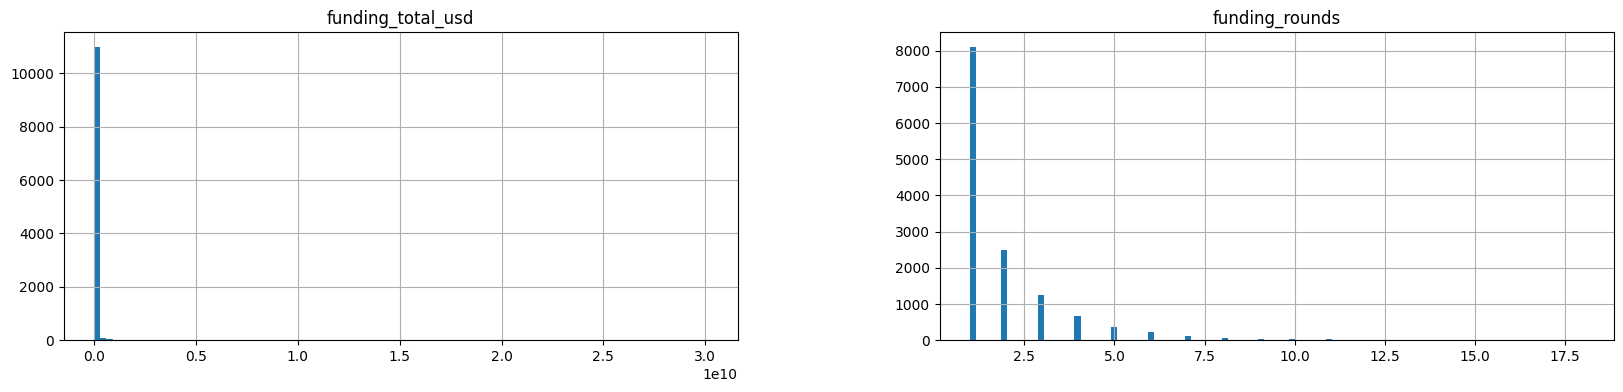

In [15]:
raw_data.hist(bins=100, figsize=(20, 4))

plt.show()

The funding_total_usd column distribution is hard to see, since it has a lot of outliers. So lets inspect the funding_total_usd column.

In [16]:
raw_data['funding_total_usd'].describe()

count    1.114300e+04
mean     3.580863e+07
std      3.687556e+08
min      2.000000e+00
25%      1.000000e+06
50%      5.800000e+06
75%      2.200000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

### Detect Outliers

The minimum value is 2 usd, which is doesn't make any sense, there is no way someone is funding a startup by 2 usd (it could be an invalid input). Lets check it further by using interquartile rule to find outliers.

In [17]:
def find_outliers(data):
    data = np.array(data.dropna())
    
    inter_quant = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    
    upper_bound = np.quantile(data, 0.75) + 1.5*inter_quant
    lower_bound = np.quantile(data, 0.25) - 1.5*inter_quant
    
    lower_outliers = data < lower_bound
    upper_outliers = data > upper_bound
    
    return pd.Series(lower_outliers | upper_outliers)

In [18]:
outliers = find_outliers(raw_data['funding_total_usd'])


outliers

0        False
1        False
2        False
3        False
4        False
         ...  
11138    False
11139    False
11140     True
11141    False
11142    False
Length: 11143, dtype: bool

Lets check if our desired outliers (small number) still exist or not.

In [19]:
raw_data[['funding_total_usd']].dropna().reset_index(drop=True)[~outliers].describe()

,funding_total_usd
count,9.855000e+03
mean,9.508785e+06
std,1.222009e+07
min,2.000000e+00
25%,7.000000e+05
50%,4.000000e+06
75%,1.398045e+07
max,5.350000e+07


Nope, the interquartile method just remove the upper outliers. Which is in this context, it still possible for startup to get up to 1x10^10 usd fund, so lets keep the upper bound outliers. We will consider snother method to remove lower bound outliers. Let set a threshold for 1000 usd, it means anything under 1000 usd fund considered as invalid input.

In [20]:
valid_input = ~(raw_data['funding_total_usd'] < 1000)

raw_data[['funding_total_usd']][valid_input]

,funding_total_usd
15,5000000.0
20,500000.0
23,2535000.0
31,1250000.0
32,35000000.0
...,...
66349,3805520.0
66350,13000000.0
66352,866550786.0
66358,15419877.0


Lets see what row that has invalid input in funding_total_usd column.

In [21]:
invalid_input_id = raw_data[['funding_total_usd']][~valid_input].index

invalid_input_id

Int64Index([6371, 6487, 55916, 66220], dtype='int64')

In [22]:
raw_data = raw_data.drop(
    invalid_input_id,
    errors='ignore'
)

Lets visualize the distribution.

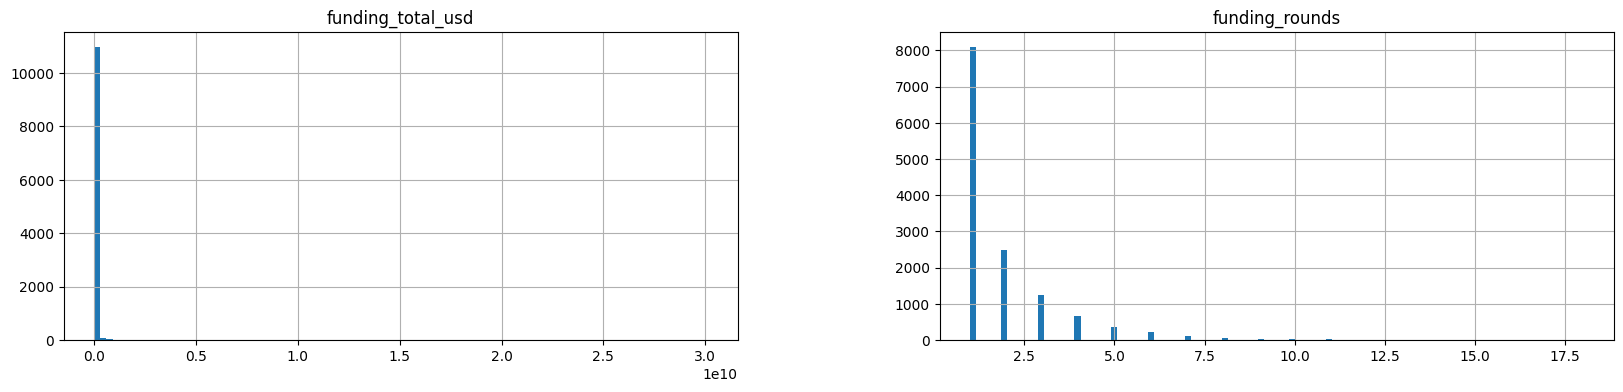

In [23]:
raw_data.hist(
    bins=100,
    figsize=(20, 4)
)

plt.show()

It still not clear what happened with the distribution (we just eliminate the lower bound outliers, where the main problem of unclear visualization is the upper bound outliers). Lets Continue to the categorical data.

### Categorical Data

In [24]:
cat_data = raw_data.select_dtypes(include=object)

cat_data.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,acquired,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,acquired,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,acquired,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08


### Check Uniqueness of the Data

In [25]:
cat_data.nunique()

permalink           13330
name                13321
homepage_url        12096
category_list        5745
status                  3
country_code           84
state_code            209
region                595
city                 1711
founded_at           1637
first_funding_at     3789
last_funding_at      3666
dtype: int64

That's a lot of unique values! Lets just drop the permalink, name, and hompeage_url because these columns almost unique, so there is no point to plot the distribution.
<br>

Next, lets inspect each the category_list because it look like it has too many unique value. 

### category_list

In [26]:
cat_data

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,first_funding_at,last_funding_at
15,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,2012-03-01,2015-03-17,2015-03-17
20,/organization/1000-markets,1000 Markets,http://www.1000markets.com,Art|E-Commerce|Marketplaces,acquired,USA,WA,Seattle,Seattle,2009-01-01,2009-05-15,2009-05-15
23,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,2010-07-01,2010-01-01,2011-02-16
31,/organization/100plus,100Plus,http://www.100plus.com,Analytics,acquired,USA,CA,SF Bay Area,San Francisco,2011-09-16,2011-11-02,2011-11-30
32,/organization/1010data,1010data,http://www.1010data.com,Software,acquired,USA,NY,New York City,New York,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
66349,/organization/zyncro,Zyncro,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,acquired,ESP,56,Barcelona,Barcelona,2009-09-01,2011-04-05,2012-02-03
66350,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,Pharmaceuticals,ipo,USA,PA,Philadelphia,Radnor,2014-01-01,2014-10-14,2014-10-14
66352,/organization/zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,2007-07-01,2007-01-01,2011-02-18
66358,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,1994-01-01,2008-01-01,2013-02-15


In [27]:
count_categories = cat_data['category_list'].value_counts()

count_categories

Software                                                            917
Biotechnology                                                       807
Curated Web                                                         373
Mobile                                                              272
Enterprise Software                                                 247
                                                                   ... 
Networking|Technology|Web Hosting                                     1
E-Commerce|Facebook Applications                                      1
Collaborative Consumption|E-Commerce|Marketplaces|Tourism|Travel      1
Apps|Internet                                                         1
Facebook Applications|Games|Networking|Technology                     1
Name: category_list, Length: 5745, dtype: int64

As we can see, startup that has multiple categories treated as unique, for now lets drop these startup, we will come back later in data preprocessing to include it in machine learning pipeline.
<br>
We can see a pattern here, it consider multiple categories when '|' appears, so lets find these values

In [28]:
mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')

mul_categories

/tmp/ipykernel_4003/235368749.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mul_categories = count_categories.index.str.replace('|', ',').str.contains(',')


array([False, False, False, ...,  True,  True,  True])

In [29]:
single_categories = count_categories[~mul_categories]

single_categories

Software               917
Biotechnology          807
Curated Web            373
Mobile                 272
Enterprise Software    247
                      ... 
Trading                  1
Clinical Trials          1
Smart Grid               1
Bitcoin                  1
Developer APIs           1
Name: category_list, Length: 214, dtype: int64

We got the single_categories list! We will use it in data preprocessing to cluster the categories_list belong to one of these categories by using One Hot Encoder.

## EDA Conclusion

Lets wrap it up:
1. SInce our objective is predict if startup success or not (ipo, acquired, closed), we drop the 'operating' rows.
2. The target variables not uniformly distributed, so we will evaluate our model using ROC-AUC or F1 score later.
3. There are suspectible duplicate startup data, however permalink treat it as unique, so for now we assume these startups with the same name is unique.
4. The funding_total_usd contains outliers (the lower bound one), since it doesn't make any sense for someone to fund a startup by just 2 usd...
5. Some startups have multiple categories in category_list, we will transform it in data preprocessing later before do machine learning modeling.

## Data Preprocessing

Since the permalink and name almost unique, we can drop these features.

In [45]:
data = raw_data.drop(['permalink', 'name'], axis=1).reset_index(drop=True)

data

,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,http://www.1mainstream.com,Apps|Cable|Distribution|Software,5000000.0,acquired,USA,CA,SF Bay Area,Cupertino,1,2012-03-01,2015-03-17,2015-03-17
1,http://www.1000markets.com,Art|E-Commerce|Marketplaces,500000.0,acquired,USA,WA,Seattle,Seattle,1,2009-01-01,2009-05-15,2009-05-15
2,http://1000memories.com,Curated Web,2535000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,2010-07-01,2010-01-01,2011-02-16
3,http://www.100plus.com,Analytics,1250000.0,acquired,USA,CA,SF Bay Area,San Francisco,2,2011-09-16,2011-11-02,2011-11-30
4,http://www.1010data.com,Software,35000000.0,acquired,USA,NY,New York City,New York,1,2000-01-01,2010-03-08,2010-03-08
...,...,...,...,...,...,...,...,...,...,...,...,...
13325,http://www.zyncro.com,Cloud Computing|Enterprise 2.0|Enterprise Soft...,3805520.0,acquired,ESP,56,Barcelona,Barcelona,2,2009-09-01,2011-04-05,2012-02-03
13326,http://zynerba.com,Pharmaceuticals,13000000.0,ipo,USA,PA,Philadelphia,Radnor,1,2014-01-01,2014-10-14,2014-10-14
13327,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,866550786.0,ipo,USA,CA,SF Bay Area,San Francisco,9,2007-07-01,2007-01-01,2011-02-18
13328,http://www.zyraz.com,Biotechnology,15419877.0,closed,MYS,14,MYS - Other,Damansara New Village,4,1994-01-01,2008-01-01,2013-02-15


### Data Split

In [209]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data.drop('status', axis=1),
    data[['status']],
    test_size=0.2,
    random_state=69
)

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=69
)

In [210]:
X_train.head()

,homepage_url,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
5399,http://www.ilike.com/,Artists Globally|Social Media,16500000.0,USA,WA,Seattle,Seattle,3,2012-04-28,2002-01-01,2006-01-01
8282,http://www.openair.com,Software,16000000.0,USA,MA,Boston,Boston,1,1999-01-01,2000-01-01,2000-01-01
6398,https://www.lendvo.com,NaN,1325000.0,NaN,NaN,NaN,NaN,1,2015-06-23,2015-06-23,2015-06-23
2645,http://www.complete.ie,Web Hosting,5630000.0,NaN,NaN,NaN,NaN,1,2001-01-01,2007-09-24,2007-09-24
4711,http://www.glossybox.com,Beauty|Communities|E-Commerce,NaN,DEU,16,Berlin,Berlin,2,2011-01-01,2011-02-15,2011-05-31


### homepage_url Transformation

In [227]:
http_sep = X_train['homepage_url'].str.split('://', expand=True)

dom_url = http_sep[1].str.replace('www.', '').str.split('.', expand=True, n=1)

temp_dom = dom_url[1].str.split('/', expand=True, n=1)[0]

dom_index = temp_dom.value_counts()[temp_dom.value_counts() > 4].index

none_index = temp_dom[~temp_dom.str.contains('|'.join(dom_index)).fillna(False)].index

temp_dom[none_index] = None

X_train['protocol_url'] = http_sep[0]
X_train['domain_url'] = temp_dom

/tmp/ipykernel_4003/3841103948.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dom_url = http_sep[1].str.replace('www.', '').str.split('.', expand=True, n=1)


In [231]:
dom_index

Index(['com', 'net', 'ru', 'co', 'co.uk', 'io', 'de', 'org', 'com.br', 'me',
       'tv', 'com.au', 'us', 'fr', 'ca', 'in', 'nl', 'fm', 'it', 'co.jp', 'se',
       'cn', 'jp', 'com.cn', 'eu', 'ag', 'mobi', 'es', 'no', 'pl', 'ch', 'ly',
       'info', 'cz', 'co.il'],
      dtype='object')

In [228]:
temp_dom.isna().value_counts()

False    7159
True      839
Name: 0, dtype: int64

In [229]:
X_train['domain_url'].value_counts()

com            6191
net             133
ru               86
co               73
co.uk            57
               ... 
pipapai.com       1
or.it             1
mail.com          1
co.ke             1
jobuy.com         1
Name: domain_url, Length: 126, dtype: int64